# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
import plotly.express as px

# Reading CSV file and selecting London data

In [2]:
df=pd.read_csv('ready_for_clustering.csv')

df_london = df.loc[(df['loc'] == 'L')]
# df_london=df_london.sample(8000)

In [3]:
df_london.head(10)

,Unnamed: 0,text,created_at,longitude,latitude,loc,sentiment
0,112,check out our website london united ...,2022-12-31 12:52:29+00:00,-0.109400,51.514100,L,5
1,143,edinburgh residents warned of scammers pu...,2022-12-31 10:37:27+00:00,-0.122459,51.509638,L,1
2,164,we look forward to welcoming in the with ...,2022-12-31 09:32:29+00:00,-0.147519,51.473974,L,5
3,203,love you hijos its been amazing day ...,2022-12-30 23:16:26+00:00,0.003068,51.502895,L,5
4,220,what a way to end the year tomorrow one of ...,2022-12-30 21:27:31+00:00,-0.118201,51.517928,L,5
5,234,raising a glass of swe to the legendary ...,2022-12-30 19:49:07+00:00,-0.033300,51.452300,L,5
6,242,hampstead heath by night parliament hi...,2022-12-30 18:47:55+00:00,-0.159639,51.559661,L,4
7,250,do it with passion or not at all dancer: mar...,2022-12-30 17:44:34+00:00,-0.204984,51.416389,L,5
9,280,bloody tourists carnaby london sxa...,2022-12-30 14:59:07+00:00,-0.139080,51.513390,L,1
10,338,todays shot in the times as the cheer teams...,2022-12-30 09:20:03+00:00,-0.109400,51.514100,L,5


In [4]:
df_london.drop(['Unnamed: 0'], axis=1)

,text,created_at,longitude,latitude,loc,sentiment
0,check out our website london united ...,2022-12-31 12:52:29+00:00,-0.109400,51.514100,L,5
1,edinburgh residents warned of scammers pu...,2022-12-31 10:37:27+00:00,-0.122459,51.509638,L,1
2,we look forward to welcoming in the with ...,2022-12-31 09:32:29+00:00,-0.147519,51.473974,L,5
3,love you hijos its been amazing day ...,2022-12-30 23:16:26+00:00,0.003068,51.502895,L,5
4,what a way to end the year tomorrow one of ...,2022-12-30 21:27:31+00:00,-0.118201,51.517928,L,5
...,...,...,...,...,...,...
28206,happy new year # london united kingdom,2020-01-01 02:06:32+00:00,-0.127318,51.507115,L,5
28207,solo pido que siempre sonres y que siempre sea...,2020-01-01 01:07:43+00:00,-0.127318,51.507115,L,5
28208,# # london united kingdom,2020-01-01 00:14:47+00:00,-0.127318,51.507115,L,1
28209,happy new year slydu,2020-01-01 00:07:39+00:00,-0.127318,51.507115,L,5


In [5]:
lat_long=df_london[['latitude', 'longitude']]
lat, longg=df_london.latitude, df_london.longitude

Plot the data using Scatter Plot

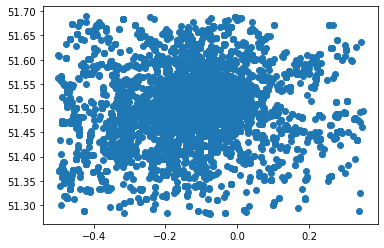

In [6]:
plt.scatter(longg, lat)

# Perform the GridSearch to find best parameters for the model

In [7]:
X= lat_long.to_numpy()
X.shape

(27300, 2)

In [23]:
# Grid Search
epsilons = np.linspace(0.01, 1, num=10)
min_samples= np.arange (40,100, step=12)
combinations= list(itertools.product(epsilons, min_samples))
N =len(combinations)

In [24]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list =[]
    
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -=1
            
        if(num_clusters <2) or (num_clusters > 20):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration  {i+1} of  {N} has {num_clusters} clusters. Moving on")
            continue
        
        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score : {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters : {num_clusters}")
        
    best_index=np.argmax(scores)
    best_parameters=combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score= scores[best_index]
    
    return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1],
            'best_labesl':best_labels,
            'best_score': best_score}



In [25]:
best_dict = get_scores_and_labels(combinations, X)  

Combination (0.01, 40) on iteration  1 of  50 has 42 clusters. Moving on
Combination (0.01, 52) on iteration  2 of  50 has 34 clusters. Moving on
Combination (0.01, 64) on iteration  3 of  50 has 25 clusters. Moving on
Combination (0.01, 76) on iteration  4 of  50 has 23 clusters. Moving on
Index: 4, Score : 0.2321663259382363, Labels: [ 0  0  0 ...  0  0 -1], NumClusters : 20
Combination (0.12, 40) on iteration  6 of  50 has 1 clusters. Moving on
Combination (0.12, 52) on iteration  7 of  50 has 1 clusters. Moving on
Combination (0.12, 64) on iteration  8 of  50 has 1 clusters. Moving on
Combination (0.12, 76) on iteration  9 of  50 has 1 clusters. Moving on
Combination (0.12, 88) on iteration  10 of  50 has 1 clusters. Moving on
Combination (0.23, 40) on iteration  11 of  50 has 1 clusters. Moving on
Combination (0.23, 52) on iteration  12 of  50 has 1 clusters. Moving on
Combination (0.23, 64) on iteration  13 of  50 has 1 clusters. Moving on
Combination (0.23, 76) on iteration  14 

In [26]:
best_dict

{'best_epsilon': 0.01,
 'best_min_samples': 88,
 'best_labesl': array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64),
 'best_score': 0.2321663259382363}

# Prepare the Model

Let's prepare the model using the eps and min samples value from our GridSearch 

In [41]:
dbscan_cluster_model=DBSCAN(eps=0.01, min_samples=88).fit(X)
dbscan_cluster_model
df_london['cluster']=dbscan_cluster_model.labels_
df_london['cluster'].value_counts()

C:\Users\sures\AppData\Local\Temp\ipykernel_1940\2903410375.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 0     16173
-1      5803
 3      1026
 8      1016
 17      672
 15      398
 4       274
 6       225
 16      224
 14      188
 10      173
 12      146
 2       137
 1       120
 9       120
 11      115
 5       110
 19      104
 13       97
 18       90
 7        89
Name: cluster, dtype: int64

# Visualize the data using Scatter Plot

Let's visualize the data using the scatter plot to find the clusters and noise

In [42]:
df_london.head()

,Unnamed: 0,text,created_at,longitude,latitude,loc,sentiment,cluster
0,112,check out our website london united ...,2022-12-31 12:52:29+00:00,-0.109400,51.514100,L,5,0
1,143,edinburgh residents warned of scammers pu...,2022-12-31 10:37:27+00:00,-0.122459,51.509638,L,1,0
2,164,we look forward to welcoming in the with ...,2022-12-31 09:32:29+00:00,-0.147519,51.473974,L,5,0
3,203,love you hijos its been amazing day ...,2022-12-30 23:16:26+00:00,0.003068,51.502895,L,5,-1
4,220,what a way to end the year tomorrow one of ...,2022-12-30 21:27:31+00:00,-0.118201,51.517928,L,5,0


In [39]:
fig=px.scatter(x=longg, y=lat, color=df_london['cluster'])
fig.show()

In [40]:
ss(X, df_london['cluster'])

0.2257016026264896

# Load the DBSCAN clustered data into PostgreSQL Database

Now, we will be loading this clustered data into the PostgreSQL database before finally importing them to Microsoft PowerBI and visualize them.

In [31]:
import psycopg2
import pandas as pd

# Connect to the database
conn = psycopg2.connect(dbname='msc_project', user='postgres', password='postgres', host='localhost')

# Create a cursor
cur = conn.cursor()

# Execute a query to create a table in the database
cur.execute("delete from dbscan_london cascade;")

cur.execute("CREATE TABLE IF NOT EXISTS dbscan_london (id serial, text text, created_at timestamp, latitude numeric, longitude numeric, sentiment smallint, cluster smallint);")

# Use the cursor to execute an INSERT statement for each row in the DataFrame
# The %s placeholder is used to specify that a string value will be passed in
for index, row in df_london.iterrows():
    cur.execute("INSERT INTO dbscan_london (text, created_at, latitude, longitude, sentiment, cluster) VALUES (%s, %s, %s, %s, %s, %s)", (row['text'], row['created_at'], row['latitude'], row['longitude'], row['sentiment'],row['cluster']))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()